/Users/anton/dev/.virtual_envs/default_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/anton/dev/.virtual_envs/default_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


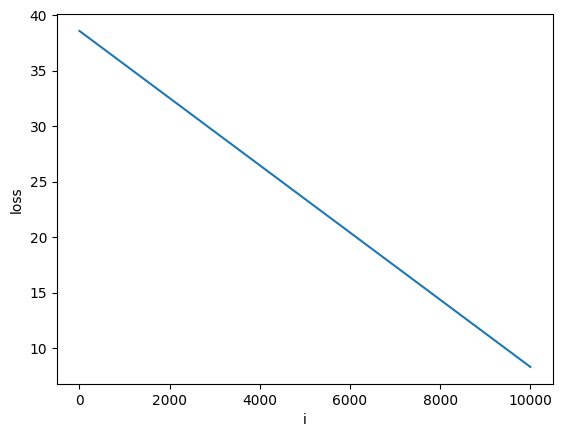

KeyboardInterrupt: 

In [5]:
from collections import defaultdict
from tqdm.notebook  import tqdm
from IPython.display import clear_output
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from tensor import GTensor
import numpy as np

train_steps = int(1e7)
learning_rate = 1e-5

n_features = 2

n_weights_layer_1 = 4
n_outputs = 1

random_num = lambda: np.random.normal(0, 1)

w = GTensor(dims=(n_weights_layer_1, n_features), initial_value=random_num, name="w")
b = GTensor(dims=(n_weights_layer_1,), initial_value=random_num, name="b")

w2 = GTensor(dims=(n_outputs, n_weights_layer_1), initial_value=random_num, name="w2")
b2 = GTensor(dims=(n_outputs,), initial_value=random_num, name="b2")

x = [
    [0.0, 0.0],
    [0.0, 1.0],
    [1.0, 0.0],
    [1.0, 1.0],
    [0.0, 2.0],
    [2.0, 0.0],
    [2.0, 2.0],
]

y_true = [0.0, 1.0, 1.0, 2.0, 2.0, 2.0, 4.0]

def relu(x):
    return x if x > 0 else 0

def relu_grad(self_var, downstream_var, other_var):
    return 1.0 if self_var > 0 else 0

def func(x, w, b):
    return [
        (w2.vecmul(
            (w.vecmul(x_) + b).applyfunc(relu, grad_func=relu_grad)
        ) + b2).to_gfloat()
        for x_ in x
    ]


res = defaultdict(list)
for i in tqdm(range(train_steps)):
    if i % (train_steps // 5) == 0:
        learning_rate *= 0.5
    
    y = func(x, w, b)
    loss = sum([(y_ - y_t) ** 2 for y_, y_t in zip(y, y_true)]) / len(x)
    
    if i % (train_steps // 1000) == 0:
        print(f"{i=}, {learning_rate=}, {loss.val=}")

        res["i"].append(i)
        res["w"].append(w.values)
        res["b"].append(b.values)
        res["loss"].append(loss.val)

        clear_output(wait=True)
        plt.clf()

        res_df = pd.DataFrame(res)
        sns.lineplot(data=res_df, x="i", y="loss")
        plt.show()

    loss.update_full_network(learning_rate, clear_grad=True, clear_downstream_data=True)


In [2]:
y = func(x, w, b)
y

[GFloat(0.1511653634943807, is_updateable=False, name=b2i0_add_w2i0j0_mul_bi0_add_wi0j0_mul_w_vecmul_otheri0_radd_0_add_wi0j1_mul_w_vecmul_otheri1_applyfunc_relu_radd_0_add_w2i0j1_mul_bi1_add_wi1j0_mul_w_vecmul_otheri0_radd_0_add_wi1j1_mul_w_vecmul_otheri1_applyfunc_relu_add_w2i0j2_mul_bi2_add_wi2j0_mul_w_vecmul_otheri0_radd_0_add_wi2j1_mul_w_vecmul_otheri1_applyfunc_relu_add_w2i0j3_mul_bi3_add_wi3j0_mul_w_vecmul_otheri0_radd_0_add_wi3j1_mul_w_vecmul_otheri1_applyfunc_relu),
 GFloat(0.9005640545819363, is_updateable=False, name=b2i0_add_w2i0j0_mul_bi0_add_wi0j0_mul_w_vecmul_otheri0_radd_0_add_wi0j1_mul_w_vecmul_otheri1_applyfunc_relu_radd_0_add_w2i0j1_mul_bi1_add_wi1j0_mul_w_vecmul_otheri0_radd_0_add_wi1j1_mul_w_vecmul_otheri1_applyfunc_relu_add_w2i0j2_mul_bi2_add_wi2j0_mul_w_vecmul_otheri0_radd_0_add_wi2j1_mul_w_vecmul_otheri1_applyfunc_relu_add_w2i0j3_mul_bi3_add_wi3j0_mul_w_vecmul_otheri0_radd_0_add_wi3j1_mul_w_vecmul_otheri1_applyfunc_relu),
 GFloat(1.4230165794297394, is_updateabl

In [3]:
y_true

[0.0, 1.0, 1.0, 2.0, 2.0, 2.0, 4.0]

In [ ]:
from gradient_float import GRAD_FUNCS
GRAD_FUNCS

{'add': <function gradient_float.<lambda>(self_var, downstream_var, other_var)>,
 'radd': <function gradient_float.<lambda>(self_var, downstream_var, other_var)>,
 'mul': <function gradient_float.<lambda>(self_var, downstream_var, other_var)>,
 'rmul': <function gradient_float.<lambda>(self_var, downstream_var, other_var)>,
 'sub': <function gradient_float.<lambda>(self_var, downstream_var, other_var)>,
 'rsub': <function gradient_float.<lambda>(self_var, downstream_var, other_var)>,
 'div': <function gradient_float.<lambda>(self_var, downstream_var, other_var)>,
 'rdiv': <function gradient_float.<lambda>(self_var, downstream_var, other_var)>,
 'pow': <function gradient_float.<lambda>(self_var, downstream_var, other_var)>}

In [ ]:
class Relu:
    def __init__(self):
        self.forward.__name__ = f"{type(self)}_forward"

    @classmethod
    def forward(self_var):
        return self_var if self_var > 0 else 0

    @classmethod
    def grad(self_var, downstream_var, other_var):
        return 1.0 if self_var > 0 else 0


r = Relu()
r.forward.__name__

NameError: name 'setattribute' is not defined